<a href="https://colab.research.google.com/github/jinmeta/TSF-TASK/blob/main/TASK2_Prediction_Using_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Jinendra Mehta

Hello Guys, here we are. i hope you all are doing well. This task is part of my internship at Spark Foundation. here we are going to do some prediction using unsupervised learning. so let's go

Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets as ds

Loading iris data direct from sklearn library.

In [2]:
iris=ds.load_iris()

printing the iris data on the screen

In [3]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

making data frame from the data any assigning the lable x,y and cluster

In [4]:
df=pd.DataFrame({'X':iris.data[:,0], 'y':iris.data[:,1],'cluster':iris.target})

printing the first five raws of the data


In [5]:
df.head()

,X,y,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


here we are going to find the centroid from the given data using the mean values

In [6]:
centroids={}
for i in range(3):
  result_array=[]
  result_array.append(df.loc[df['cluster']==i]['X'].mean())
  result_array.append(df.loc[df['cluster']==i]['y'].mean())
  centroids[i]=result_array

Just printing the centroids

In [7]:
centroids

{0: [5.005999999999999, 3.428000000000001],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.9739999999999998]}

plotting graph from the data frame values. only for sepal length and sepal width.

Text(0, 0.5, 'sepal width')

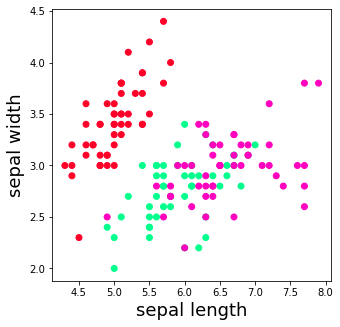

In [8]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['X'],df['y'],c=iris.target,cmap='gist_rainbow')
plt.xlabel('sepal length',fontsize=18)
plt.ylabel('sepal width',fontsize=18)

we are maping values for cluster and color. or you can say made a dictionary of key pair combination of cluster and it's color. and plotting the centroid on it's position.

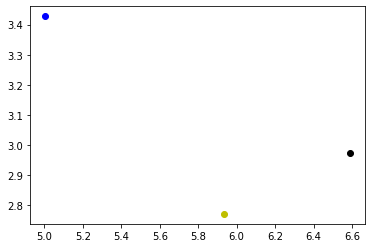

In [9]:
cmap={0:'b',1:'y',2:'k'}
for i in range(3):
  plt.scatter(centroids[i][0],centroids[i][1],color=cmap[i])

just mixture of the centroids and actual data with opacity of actual data wich is alpha.

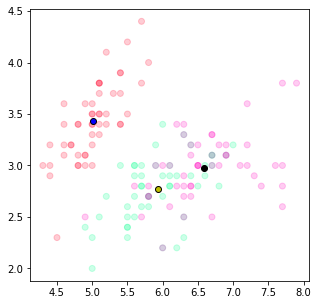

In [10]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['X'],df['y'],c=iris.target,cmap='gist_rainbow',alpha=0.2)
cmap={0:'b',1:'y',2:'k'}
for i in range(3):
  plt.scatter(centroids[i][0],centroids[i][1],color=cmap[i],edgecolor='k')

making function for making data more efficiant by training it or you can say near to the centroid data will make clusters and we will update our existing data with new values of point near to the centroids. and we will add that point in coresponding circle or cluster.

In [11]:
def ass(df,centroids):
  for i in range(3):
    df['distance_from_{}'.format(i)]=(np.sqrt((df['X']-centroids[i][0])**2 + (df['y']-centroids[i][1])**2))
  
  #centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
  cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
  df['closest']=df.loc[:,cols].idxmin(axis=1)
  df['closest']=df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
  df['color']=df['closest'].map(lambda x: cmap[x])
  return df

just calling the function

In [12]:
df = ass(df,centroids)

printing new data with updated data

In [13]:
df

,X,y,cluster,distance_from_0,distance_from_1,distance_from_2,closest,color
0,5.1,3.5,0,0.118406,1.109863,1.578233,0,b
1,4.9,3.0,0,0.440931,1.061224,1.688200,0,b
2,4.7,3.2,0,0.381602,1.308662,1.901478,0,b
3,4.6,3.1,0,0.521939,1.376153,1.991989,0,b
4,5.0,3.6,0,0.172105,1.250998,1.706933,0,b
...,...,...,...,...,...,...,...,...
145,6.7,3.0,2,1.747232,0.797870,0.114978,2,k
146,6.3,2.5,2,1.592363,0.453206,0.554635,1,y
147,6.5,3.0,2,1.554098,0.609094,0.091761,2,k
148,6.2,3.4,2,1.194328,0.683078,0.576212,2,k


ploting the graph basis of new centroid points

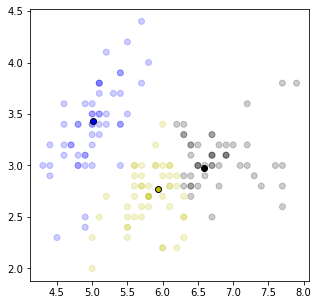

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(df['X'],df['y'],color=df['color'],alpha=0.2)
for i in centroids.keys():
  plt.scatter(*centroids[i],color=cmap[i],edgecolors='k')

updating the centroid point on th ebasis of data

In [15]:
def update(k):
    for i in range(3):
        centroids[i][0] = np.mean(df[df['closest'] == i]['X'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

function call

In [16]:
centroids = update(centroids)
centroids

{0: [5.00943396226415, 3.383018867924529],
 1: [5.806122448979591, 2.693877551020408],
 2: [6.802083333333331, 3.0687499999999996]}

ploting the new updated graph

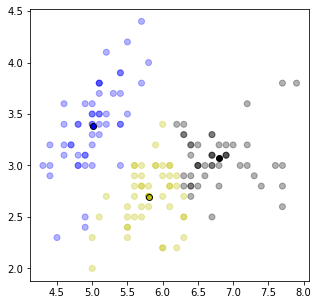

In [17]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['X'], df['y'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=cmap[i], edgecolor='k')

plt.show()

calling the function again

In [18]:
df = ass(df, centroids)

ploting the graph again

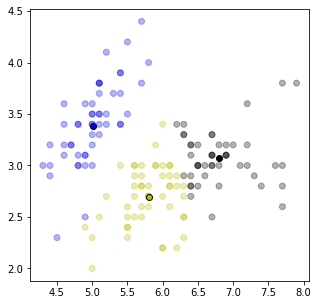

In [19]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['X'], df['y'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=cmap[i], edgecolor='k')
plt.show()

just making the assignment process and updating process automatic. for several time until the point makes 3 diffrent cluster.

In [20]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = ass(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

printing the cluster and related points.

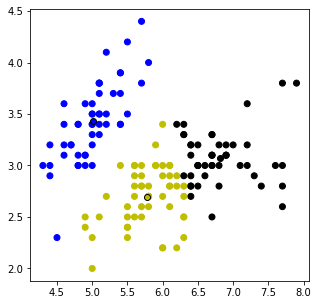

In [21]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['X'], df['y'], color=df['color'])
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=cmap[i], edgecolor='k')

plt.show()

Here we made the cluster and predicted the type of the iris flowers.

Thank you for watching this video.
if any peer is watching this thank you for evaluating my video. and task.